# Python: Introduction to Machine Learning

## Import Libraries 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#from sklearn.preprocessing import LabelEncoder  
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

pd.set_option('display.max_columns', None) # Display all columns when there are a lot of columns in dataframe
%matplotlib inline # Display Matplotlib graphs within the Notebook (and note as separate window pop-ups)

UsageError: unrecognized arguments: # Display Matplotlib graphs within the Notebook (and note as separate window pop-ups)


## Import Data 

In [2]:
df = pd.read_csv('Data/loan_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

## Exploratory Data Analysis (EDA)

- EDA is an important step in the ML/Data Science pipeline 
- Gain a high-level understanding of the data and its characteristics (data types, rows, columns, missing values, etc.)  
- This step helps provide guidance on how to pre-process the data to prep it for model building 

In [4]:
# Display data about the data (nulls, data types, rows/columns, etc.)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Check for missing Values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Display statistical summary for the data 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
# List of Unique Values in all of the categorical columns 
categorical_cols = ['Gender','Married','Education','Self_Employed', 'Property_Area']

for col in categorical_cols:
    print(f'Unique Values for {col}: {df[col].unique()}')

Unique Values for Gender: ['Male' 'Female' nan]
Unique Values for Married: ['No' 'Yes' nan]
Unique Values for Education: ['Graduate' 'Not Graduate']
Unique Values for Self_Employed: ['No' 'Yes' nan]
Unique Values for Property_Area: ['Urban' 'Rural' 'Semiurban']


In [9]:
# Checking for any repeated records with regards to Loan ID
len(df.Loan_ID.unique())

614

#### Let's Summarize! 
- Loan ID is the primary key in the data - it uniquely identifies each record 
- There are 614 rows, 13 columns
- The .describe() function can be used to quickly gauge some statistics about the data 
    - In some cases it can also help identify some incorrect data (if this was a biometric dataset with heart-rate, an minimum heartrate of 0 would be a call for investigation!) 
- 7/13 columns have missing values 
- Credit History has the highest number of missing values! 

#### Key Remarks 
- Understanding the data you are working with is very important! 
- Always strive to work with Subjet Matter Experts (SMEs) to get insight into the data 
- In a real-world application, you may need to individually evaluate each column and its values to learn the context behind the data 

## Data Analysis / Data Visualization
- Investigate to find relationships and trends within the data 
- Certain features may be more prominent in determining whether the applicant's loan with be approved or not 
- Data Visualization can help reveal key information in the data 
    - Knowing which graphs to use is a key skills that comes with practice and experience! 
- A good starting point is compare different features against the label (Loan Status) to see if there are any easily distinguishable relationships

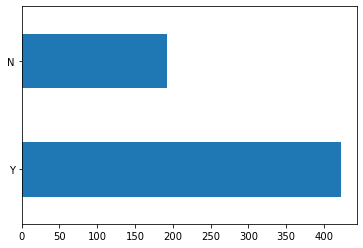

In [10]:
# Number of Approved & Not Approved (Y/N) records 
df.Loan_Status.value_counts().plot(kind='barh')

In [11]:
print(df.Loan_Status.value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


#### Gender vs Approval

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


C:\Users\sbhati\Anaconda3\envs\personal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


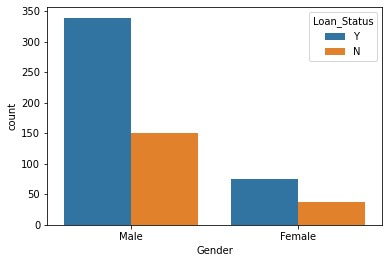

In [12]:
# Let's understand how different
print(pd.crosstab(df['Gender'],df['Loan_Status']))

sns.countplot(df['Gender'],hue=df['Loan_Status'])
plt.show()

In [13]:
print(pd.crosstab(df['Gender'], df['Loan_Status']).apply(lambda r: round(r/r.sum(),3)*100, axis=1))

Loan_Status     N     Y
Gender                 
Female       33.0  67.0
Male         30.7  69.3


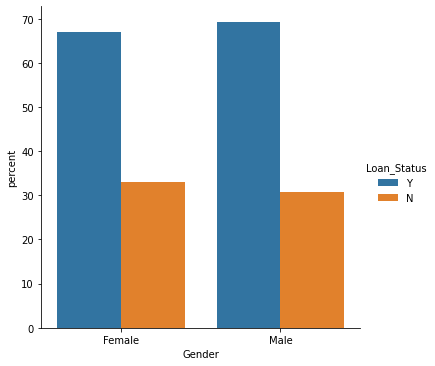

In [14]:
df_pct = df.groupby('Gender')['Loan_Status'].value_counts(normalize=True)
df_pct = df_pct.mul(100)
df_pct = df_pct.rename('percent').reset_index()

sns.catplot(x='Gender',y='percent',hue='Loan_Status',kind='bar',data=df_pct)
plt.show()

In [15]:
# Let's write this as a method to make it easy to check the loan status against all the parameters
def column_bar(df, column):
    print(pd.crosstab(df[column],df['Loan_Status']))
    print('\nPercentage')
    print(pd.crosstab(df[column], df['Loan_Status']).apply(lambda r: round(r/r.sum(),3)*100, axis=1))
    sns.countplot(df[column],hue=df['Loan_Status'])
    plt.show()
    df_pct = df.groupby(column)['Loan_Status'].value_counts(normalize=True)
    df_pct = df_pct.mul(100)
    df_pct = df_pct.rename('percent').reset_index()

    sns.catplot(x=column,y='percent',hue='Loan_Status',kind='bar',data=df_pct)
    plt.show()

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339

Percentage
Loan_Status     N     Y
Gender                 
Female       33.0  67.0
Male         30.7  69.3


C:\Users\sbhati\Anaconda3\envs\personal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


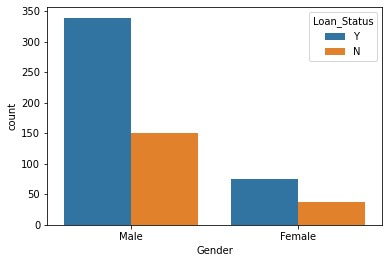

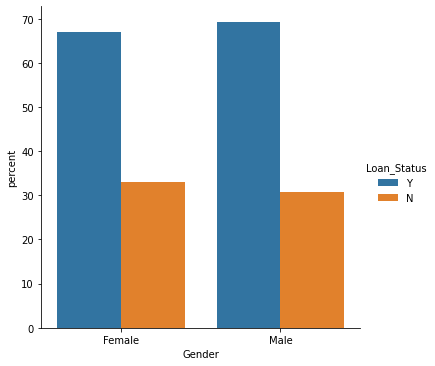

In [16]:
# Test the function 
column_bar(df, 'Gender')

#### All Categorical Features vs Approval

In [17]:
#Select the data we want to test
columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History']

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339

Percentage
Loan_Status     N     Y
Gender                 
Female       33.0  67.0
Male         30.7  69.3


C:\Users\sbhati\Anaconda3\envs\personal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


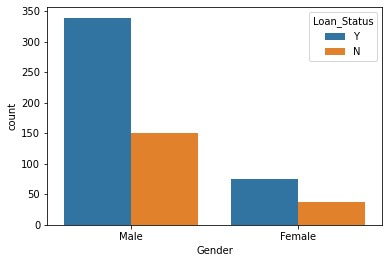

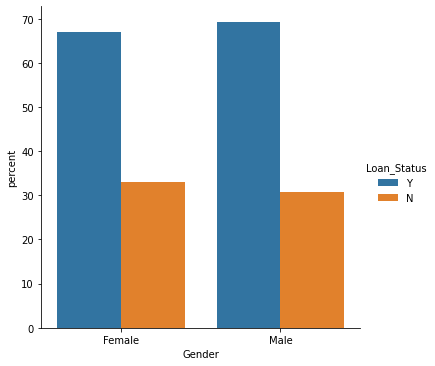

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285

Percentage
Loan_Status     N     Y
Married                
No           37.1  62.9
Yes          28.4  71.6


C:\Users\sbhati\Anaconda3\envs\personal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


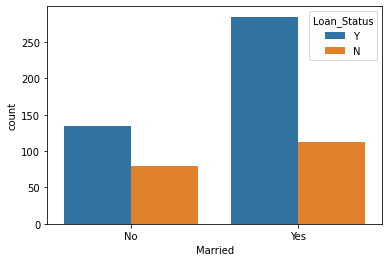

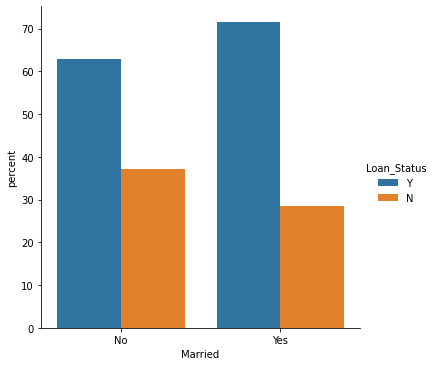

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33

Percentage
Loan_Status     N     Y
Dependents             
0            31.0  69.0
1            35.3  64.7
2            24.8  75.2
3+           35.3  64.7


C:\Users\sbhati\Anaconda3\envs\personal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


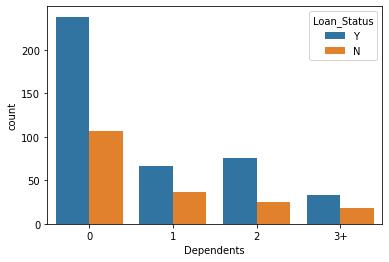

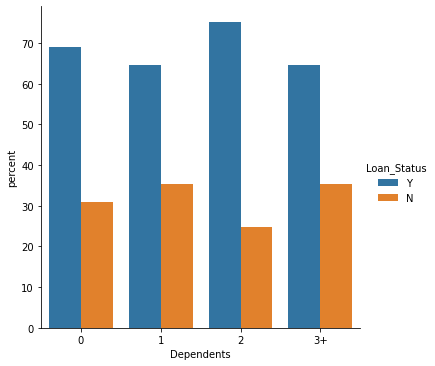

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82

Percentage
Loan_Status      N     Y
Education               
Graduate      29.2  70.8
Not Graduate  38.8  61.2


C:\Users\sbhati\Anaconda3\envs\personal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


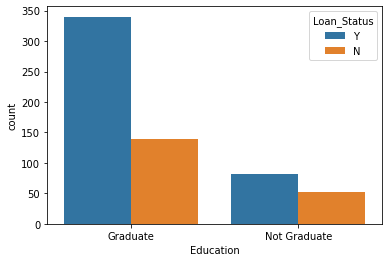

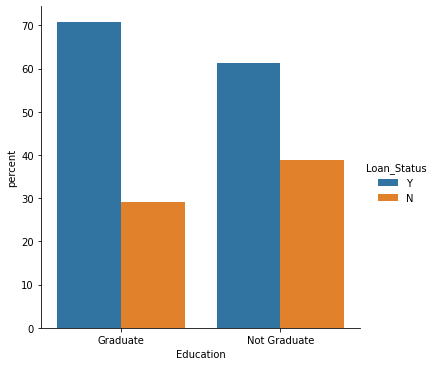

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56

Percentage
Loan_Status       N     Y
Self_Employed            
No             31.4  68.6
Yes            31.7  68.3


C:\Users\sbhati\Anaconda3\envs\personal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


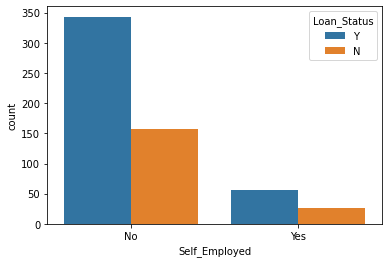

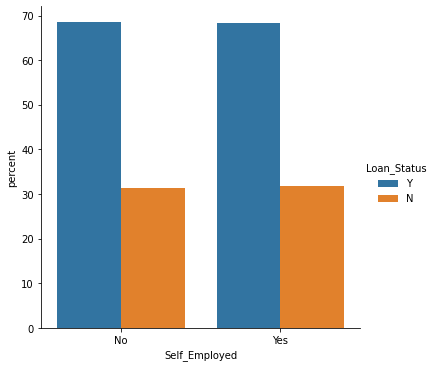

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133

Percentage
Loan_Status       N     Y
Property_Area            
Rural          38.5  61.5
Semiurban      23.2  76.8
Urban          34.2  65.8


C:\Users\sbhati\Anaconda3\envs\personal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


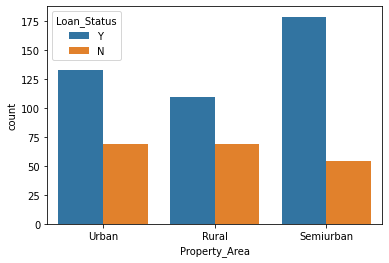

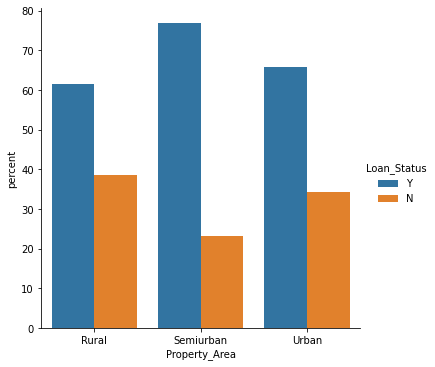

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378

Percentage
Loan_Status        N     Y
Credit_History            
0.0             92.1   7.9
1.0             20.4  79.6


C:\Users\sbhati\Anaconda3\envs\personal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


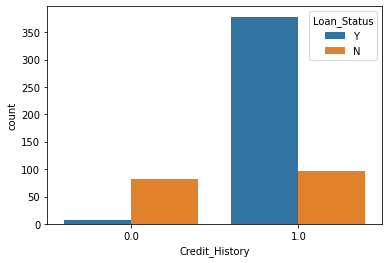

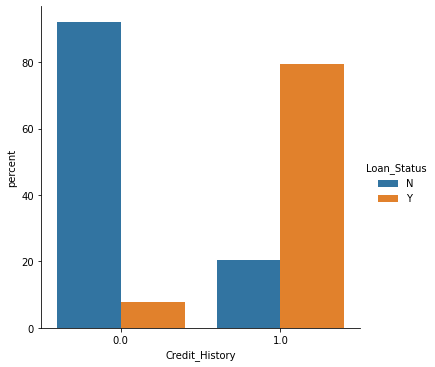

In [18]:
for column in columns:
    column_bar(df,column)

#### Continuous Features 

In [19]:
# Check Continuous variables
def column_scatter(df,column):
    plt.scatter(df[column], df['Loan_Status']);
    plt.title(column)
    plt.show()

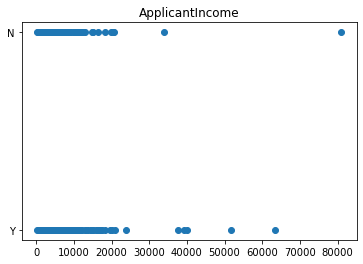

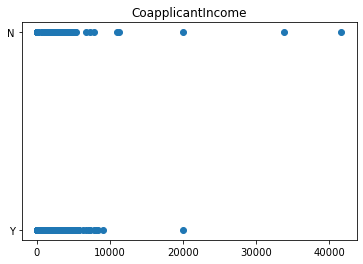

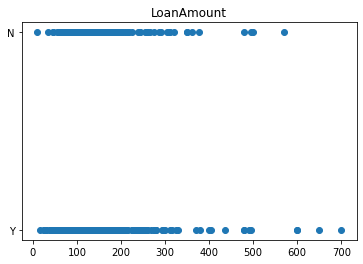

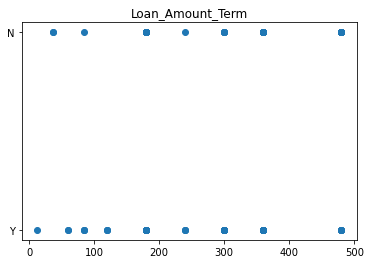

In [20]:
# ApplicantIncome
# CoapplicantIncome
# LoanAmount
# Loan_Amount_Term

scatter_columns= ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for column in scatter_columns:
    column_scatter(df,column)

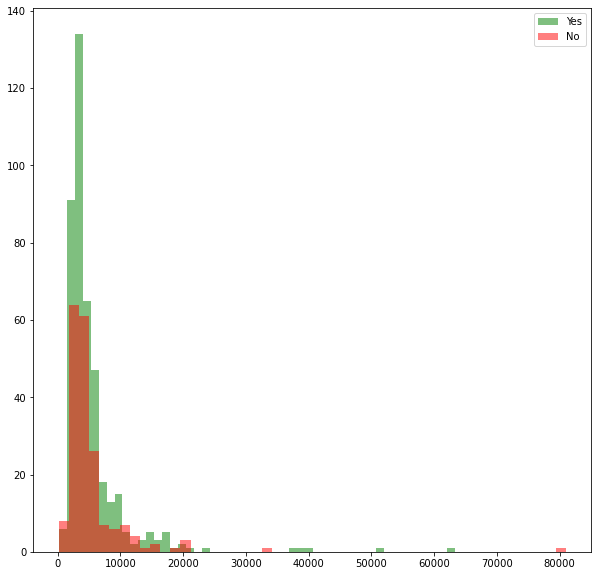

In [21]:
# Histogram -----> Review, should we keep this? 

y_loan = df.loc[df.Loan_Status == 'Y']
n_loan = df.loc[df.Loan_Status == 'N']

kwargs = dict(alpha=0.5, bins=50)

plt.figure(figsize=(10,10))
plt.hist(y_loan['ApplicantIncome'], **kwargs, color='g', label='Yes')
plt.hist(n_loan['ApplicantIncome'], **kwargs, color='r', label='No')
plt.legend()
plt.show()

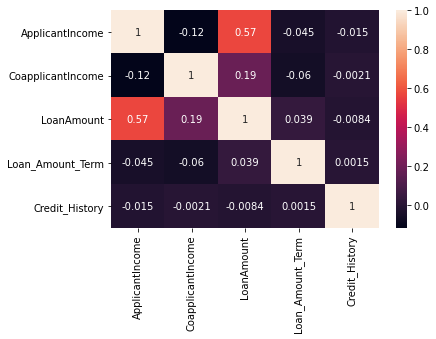

In [22]:
# Let's look at correlation next
sns.heatmap(df.corr(),annot=True)

## Model Development

### Data Preparation

#### Null Values
- There are many ways to deal with NULL values and it can have a significant impact on how your model performs
    - Deleting rows
    - Replacing with Mean, Median, Mode
    - Imputing values (KNN, ML algorithms, etc.) 

In [23]:
# Lets re-check columns with null values 
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
# Lets investigate the Loan Amount 
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

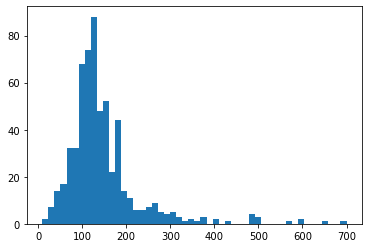

In [25]:
# Lets investigate the Loan Amount field 
plt.hist(df['LoanAmount'], bins=50)
plt.show()

In [26]:
# Replace Loan Amount NULL values with Mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [27]:
# Remove remaining records with Null values
df.dropna(inplace=True)

In [28]:
#Confirm it worked
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
#Check for duplicate entries
df.duplicated().any()

False

In [30]:
#What's the shape of the new data?
df.shape

(499, 13)

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


#### Encoding Categorical Values
- ML models can only deal with numerical values 
- Categorical data has to be encoded as numbers for use in models 
- Common techniques: Ordinal Encoding & One-Hot Encoding
    - We will us the **get_dummies()** function in Pandas to do this, however when building ML for projects, using the **LabelEncoder & OneHotEncoder** modules in Sklearn are recommended 
    - Using get_dummies() functionally creates the same result, and is quicker to easily visualize the concept
- When dealing with categorical data in production, additional solutions/algorithms may be required to deal with unseen categorical values

In [32]:
# We need to replace string data (Y,N), with numbers
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

In [33]:
df.head()
df.shape

(499, 13)

In [34]:
# One-Hot Encod the features using get_dummies() function in Pandas 

non_numerical = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

for column in non_numerical:
    enc_df = pd.get_dummies(df[column])
    print(f'{df[column].unique()}')
    df = pd.concat([df,enc_df], axis=1)

['Male' 'Female']
['No' 'Yes']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']


In [35]:
pd.set_option('display.max_columns', None)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Female,Male,No,Yes,0,1,2,3+,Graduate,Not Graduate,No,Yes,Rural,Semiurban,Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [36]:
'''
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
non_numerical = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

for column in non_numerical:
    print(le.fit(df[column]).classes_)
    df[column+'_Encoded'] = le.fit_transform(df[column])

'''

"\nfrom sklearn.preprocessing import LabelEncoder  \nle = LabelEncoder()\nnon_numerical = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']\n\nfor column in non_numerical:\n    print(le.fit(df[column]).classes_)\n    df[column+'_Encoded'] = le.fit_transform(df[column])\n\n"

In [37]:
'''
from sklearn.preprocessing import OneHotEncoder

# Create an instance of a one-hot-encoder 
enc = OneHotEncoder(handle_unknown='ignore')

#for column in non_numerical:
enc_df = pd.DataFrame(enc.fit_transform(df[['Gender_Encoded']]).toarray())
    
    # Merge with main df on key_values 
df = pd.merge(df, enc_df, left_index=True, right_index=True)

df.head()
'''

"\nfrom sklearn.preprocessing import OneHotEncoder\n\n# Create an instance of a one-hot-encoder \nenc = OneHotEncoder(handle_unknown='ignore')\n\n#for column in non_numerical:\nenc_df = pd.DataFrame(enc.fit_transform(df[['Gender_Encoded']]).toarray())\n    \n    # Merge with main df on key_values \ndf = pd.merge(df, enc_df, left_index=True, right_index=True)\n\ndf.head()\n"

In [38]:
'''# Heatmap Again
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True,cmap='jet')
'''

"# Heatmap Again\nplt.figure(figsize=(16,5))\nsns.heatmap(df.corr(),annot=True,cmap='jet')\n"

#### Feature Selection
- After analyzing the data, select the features you will use to help build the model 
- You do not always need to use every single feature. With lots of data, removing unnecessary features can save processing time, save costs, and even improve model performance
- Since the categorical features have been encoded, drop the respective non-encoded categorical columns 

In [39]:
# Obvious parameter to drop
df.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Female','Male'], axis=1, inplace=True)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,No,Yes,0,1,2,3+,Graduate,Not Graduate,No,Yes,Rural,Semiurban,Urban
0,5849,0.0,146.412162,360.0,1.0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


### Model Development

In [40]:
# Separate data into target and features
Y = df['Loan_Status'].to_frame()
X = df.drop(columns=['Loan_Status'])

In [41]:
validation_size = 0.25
seed = 12
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,test_size=validation_size,random_state=seed)

In [42]:
print(X_train.shape)
print(X_test.shape)

print('\nTrain & Test Class Counts\n')

print('Training:\n',Y_train.Loan_Status.value_counts())
print('\nTesting:\n',Y_test.Loan_Status.value_counts())

(374, 18)
(125, 18)

Train & Test Class Counts

Training:
 1    250
0    124
Name: Loan_Status, dtype: int64

Testing:
 1    91
0    34
Name: Loan_Status, dtype: int64


In [43]:
# Create model instances 
lr = LogisticRegression()
knn = KNeighborsClassifier()

models = [lr, knn] 

#### Model Training & Testing & Evaluation

In [44]:
#Model evaluation tools
from sklearn.metrics import classification_report, roc_auc_score, plot_roc_curve


Done Training: LogisticRegression()!
Mean Accuracy: 0.808

              precision    recall  f1-score   support

           0       0.50      0.71      0.59        24
           1       0.92      0.83      0.87       101

    accuracy                           0.81       125
   macro avg       0.71      0.77      0.73       125
weighted avg       0.84      0.81      0.82       125

ROC Score:0.7115384615384616


C:\Users\sbhati\Anaconda3\envs\personal\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\sbhati\Anaconda3\envs\personal\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


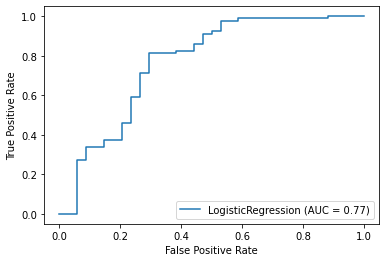


Done Training: KNeighborsClassifier()!
Mean Accuracy: 0.616

              precision    recall  f1-score   support

           0       0.18      0.23      0.20        26
           1       0.78      0.72      0.75        99

    accuracy                           0.62       125
   macro avg       0.48      0.47      0.47       125
weighted avg       0.65      0.62      0.63       125

ROC Score:0.47834518422753713


C:\Users\sbhati\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


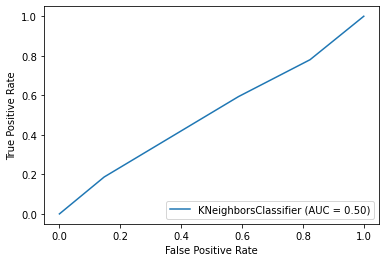

In [45]:
for model in models:
    # Train
    model.fit(X_train, Y_train)
    print(f'\nDone Training: {model}!')
    
    # Test
    print(f'Mean Accuracy: {model.score(X_test,Y_test)}\n')
    
    # Evaluate 
    y_pred = model.predict(X_test)
    print(classification_report(y_pred,Y_test))
    print(f'ROC Score:{roc_auc_score(Y_test,y_pred)}')
    
    plot_roc_curve(model, X_test, Y_test)
    plt.show()
#lr_results = models[1].predict()

#### Remarks

- The average score is not always a true representation of how good a model is, especially for classification
- What if the model has to evaluate between apples & oranges, given there are 90 apples & 10 oranges ? 
    - If the model correctly classifies 90 apples, but only 5/10 organges are correctly classified, the model would still have a high accuracy even though it clearly cannot be trusted to properly classrify oranges 

## Considerations 
 - Test out different algorithms -> Support Vector Machine
 - Iterate over the feature selection process
 - Feature Engineering: Develop your own features from the available data 
